# Исследование надежности заемщиков


Нужно разобраться, какие параметры клиента влияют на факт погашения кредита в срок. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Цель исследования** — проверить четыре гипотезы:
1. Существует зависимость между количеством детей и возвратом кредита в срок;
2. На возврат кредита в срок влияет семейное положение;
3. На возврат кредита в срок влияет уровень доход;
4. Разные цели кредита по разному влияют на его возврат в срок.

**Ход исследования**

Входные данные от банка — статистика о платёжеспособности клиентов. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверив данные на ошибки, на этапе предобработки будем искать возможность исправить самые критичные из них.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных;
 2. Предобработка данных;
 3. Проверка гипотез.

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Выводы**

Итак, в таблице 21 525 записей и 12 столбцов. Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Однако количество значений в столбцах различается - значит, в данных есть пропущенные значения. 

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [7]:
# Проверим результат - убедимся, что пропуски в столбце 'total_income' теперь отсутствуют 
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

In [15]:
# Проверим результат - выведем тип поля 'total_income'
data['total_income'].dtypes

dtype('int64')

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

54

In [17]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [18]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [19]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [20]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [21]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [23]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

**Выводы**

Предобработка данных включала в себя:

- заполнение пропущенных значений в столбцах `total_income` и `days_employed`,
- обработку аномальных значений столбца `children`,
- изменение типов данных столбца `total_income`
- удаление дубликатов — явных и неявных для столбца `education`,
- категоризацию данных по доходам и целям кредита.

Теперь можно перейти к проверке гипотез.

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [24]:
'''Формируем группы по количеству детей, в пределах каждой группы считаем абсолютное число невозвратов кредита и
общее число элементов в каждой группе (для последующего расчёта относительного значения)''' 
data_group_by_children = data.groupby('children').agg({'debt': ['sum', 'count']})
data_group_by_children['share'] = data_group_by_children['debt']['sum'] / data_group_by_children['debt']['count'] * 100
data_group_by_children 

debt            share
           sum  count          
children                       
0         1063  14107  7.535266
1          444   4809  9.232689
2          194   2052  9.454191
3           27    330  8.181818
4            4     41  9.756098
5            0      9  0.000000

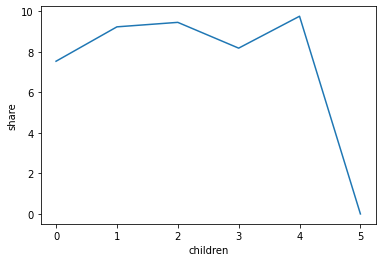

In [25]:
# Визуализируем данные средствами библиотеки seaborn
import seaborn as sns
sns.lineplot(data=data_group_by_children, x="children", y="share");

**Вывод:** Если брать абсолютные значения, то имеется линейная зависимость между количеством детей и возвратом кредита в срок. На самом деле это не так - выделенные группы значительно различаются по количеству элементов. Поэтому правильнее рассматривать относительный показатель - в этом случае зависимости нет, что хорошо видно на линейном графике. Наибольший процент невозвратов наблюдается у людей с 4-мя детьми - 9.76 %, наименьший в случае 5-ти детей - в этом случае должников нет (процент невозврата 0). Также высокие значения наблюдаются у людей с 1-м ребёнком (9.23 %) и с 2-мя детьми (9.45 %).

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [26]:
'''Формируем группы по семейному положению, в пределах каждой группы считаем абсолютное число невозвратов кредита и
общее число элементов в каждой группе (для последующего расчёта относительного значения)''' 
data_group_by_family_status = data.groupby('family_status').agg({'debt': ['sum', 'count']})
data_group_by_family_status['share'] = data_group_by_family_status['debt']['sum'] / data_group_by_family_status['debt']['count'] * 100
data_group_by_family_status

debt            share
                       sum  count          
family_status                              
Не женат / не замужем  273   2796  9.763948
в разводе               84   1189  7.064760
вдовец / вдова          63    951  6.624606
гражданский брак       385   4146  9.286059
женат / замужем        927  12266  7.557476

**Вывод:** Наибольший процент невозвратов наблюдается у людей со статусом «Не женат / не замужем» - 9.76 %, наименьший в статусе «вдовец / вдова» - 6.62 %. Также высокие значения наблюдаются у людей с семейным положением «гражданский брак» (9, 29 %). Так как значения показателя по группам отличаются, можно говорить о наличии зависимости.

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [27]:
'''Формируем группы по уровню дохода, в пределах каждой группы считаем абсолютное число невозвратов кредита и
общее число элементов в каждой группе (для последующего расчёта относительного значения)''' 
data_group_by_income_category = data.groupby('total_income_category').agg({'debt': ['sum', 'count']})
data_group_by_income_category['share'] = data_group_by_income_category['debt']['sum'] / data_group_by_income_category['debt']['count'] * 100
data_group_by_income_category

debt            share
                        sum  count          
total_income_category                       
A                         2     25  8.000000
B                       354   5014  7.060231
C                      1353  15938  8.489145
D                        21    349  6.017192
E                         2     22  9.090909

**Вывод:** Наибольший процент невозвратов наблюдается у людей с самым низким уровнем дохода (категория «E» - до 30 000) - 9.09 %, наименьший с уровнем дохода «D» (от 30 001 до 50 000) - 6.02 %. Так как под категорией дохода скрывается количественная переменная, то можно говорить об отсутствии линейной зависимости (конкретно на имеющихся данных).

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [28]:
'''Формируем группы по целям кредита, в пределах каждой группы считаем абсолютное число невозвратов кредита и
общее число элементов в каждой группе (для последующего расчёта относительного значения)''' 
data_group_by_purpose_category = data.groupby('purpose_category').agg({'debt': ['sum', 'count']})
data_group_by_purpose_category['share'] = data_group_by_purpose_category['debt']['sum'] / data_group_by_purpose_category['debt']['count'] * 100
data_group_by_purpose_category

debt            share
                          sum  count          
purpose_category                              
операции с автомобилем    400   4281  9.343611
операции с недвижимостью  780  10754  7.253115
получение образования     369   3989  9.250439
проведение свадьбы        183   2324  7.874355

**Вывод:** Наибольший процент невозвратов наблюдается у людей, чья цель кредита была связана с автомобилем - 9.34 %, наименьший  - связанный с недвижимостью (7.25 %). Также высокие значения наблюдаются у людей с целью кредита «получение образования» (9.25 %). Так как значения показателя по группам отличаются, можно говорить о наличии зависимости.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

*Ответ:* 
Причинами появления пропусков могут быть: 
1. Ошибки ввода данных;
2. Сокрытие информации - например, нежелание респондента при проведении статистического опроса отвечать на вопросы о своих доходах.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* Пропуски в количественных переменных заполняют характерными значениями. Это значения, характеризующие состояние выборки. Чтобы примерно оценить типичные значения выборки, годятся среднее арифметическое или медиана. Однако среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства, поэтому лучше использовать медиану. Другое решение - использование усечённого среднего - статистической меры центральной тенденции, рассчитанной как среднее значение для имеющегося набора данных, из которого исключены k % наибольших и k % наименьших значений.

## Общий вывод.

Исследование прошло в три этапа:
 1. Обзор данных;
 2. Предобработка данных;
 3. Проверка гипотез.
 
На первом этапе был выполнен обзор данных, в ходе которого определялось их качество и наличие ошибок.

На второй этапе эти ошибки были устранены. Предобработка данных включала в себя заполнение пропущенных значений в столбцах, обработку аномальных значений столбца, изменение типов данных столбца, удаление дубликатов и категоризацию данных.

В ходе последнего этапа - проверке гипотез - было установлено, что по имеющимя данным: 
1. Отсутствует линейная зависимость между количеством детей и возвратом кредита в срок - с увеличием числа детей не происходит увеличения (прямая зависимость) или уменьшения (обратная зависимость) числа невозвратов;
2. Можно говорить о зависимости между семейным положением и возвратом кредита в срок, так как значения метрики по группам различаются. Наибольший процент невозвратов наблюдается у людей со статусом «Не женат / не замужем» - 9.76 %, наименьший в статусе «вдовец / вдова» - 6.62 %;
3. Отсутствует линейная зависимость между доходом и возвратом кредита в срок - с увеличием дохода не происходит увеличения (прямая зависимость) или уменьшения (обратная) числа невозвратов;
4. Можно говорить о том, что разные цели кредита по разному влияют на его возврат в срок. Наибольший процент невозвратов наблюдается у людей, чья цель кредита была связана с автомобилем - 9.34 %, наименьший - связанный с недвижимостью (7.25 %).

На практике исследования содержат проверки статистических гипотез. Из данных одного файла не всегда можно сделать вывод о всей генеральной совокупности. Проверки статистических гипотез покажут, насколько они достоверны, исходя из имеющихся данных.